In [ ]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [3]:
df = pd.read_excel('/content/drive/MyDrive/Datasets/Timeseries Analysis/TimeSeriesAnalysis_SuperstoreDataset.xls')

In [4]:
furniture = df.loc[df['Category']=='Furniture']

In [5]:
furniture['Order Date'].min()

Timestamp('2014-01-06 00:00:00')

In [6]:
furniture['Order Date'].max()

Timestamp('2017-12-30 00:00:00')

In [9]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']

In [11]:
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')

<ipython-input-11-fe11077ff727>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furniture.drop(cols, axis=1, inplace=True)


In [12]:
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [13]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [14]:
furniture.head()

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939


In [15]:
furniture = furniture.set_index('Order Date')
furniture

,Sales
Order Date,
2014-01-06,2573.8200
2014-01-07,76.7280
2014-01-10,51.9400
2014-01-11,9.9400
2014-01-13,879.9390
...,...
2017-12-24,1393.4940
2017-12-25,832.4540
2017-12-28,551.2568


In [18]:
furniture['Sales']

Order Date
2014-01-06    2573.8200
2014-01-07      76.7280
2014-01-10      51.9400
2014-01-11       9.9400
2014-01-13     879.9390
                ...    
2017-12-24    1393.4940
2017-12-25     832.4540
2017-12-28     551.2568
2017-12-29    2330.7180
2017-12-30     323.1360
Name: Sales, Length: 889, dtype: float64

In [19]:
y = furniture['Sales'].resample('MS').mean()
y

Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049188
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
2017-02-01     528.179800
2

In [20]:
y['2017':]

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

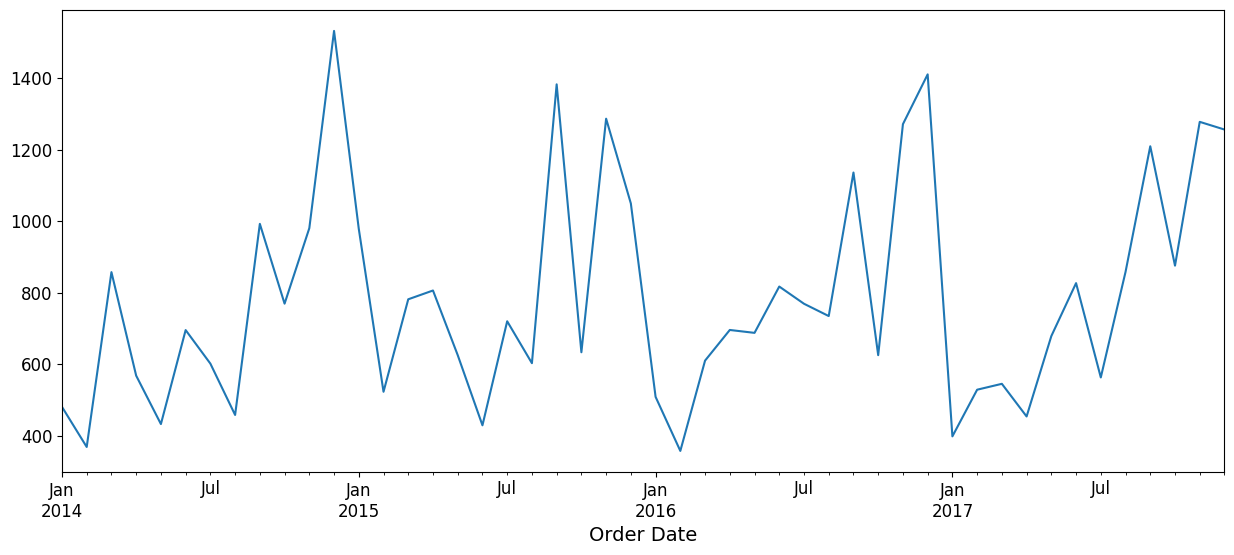

In [21]:
y.plot(figsize=(15,6))
plt.show()

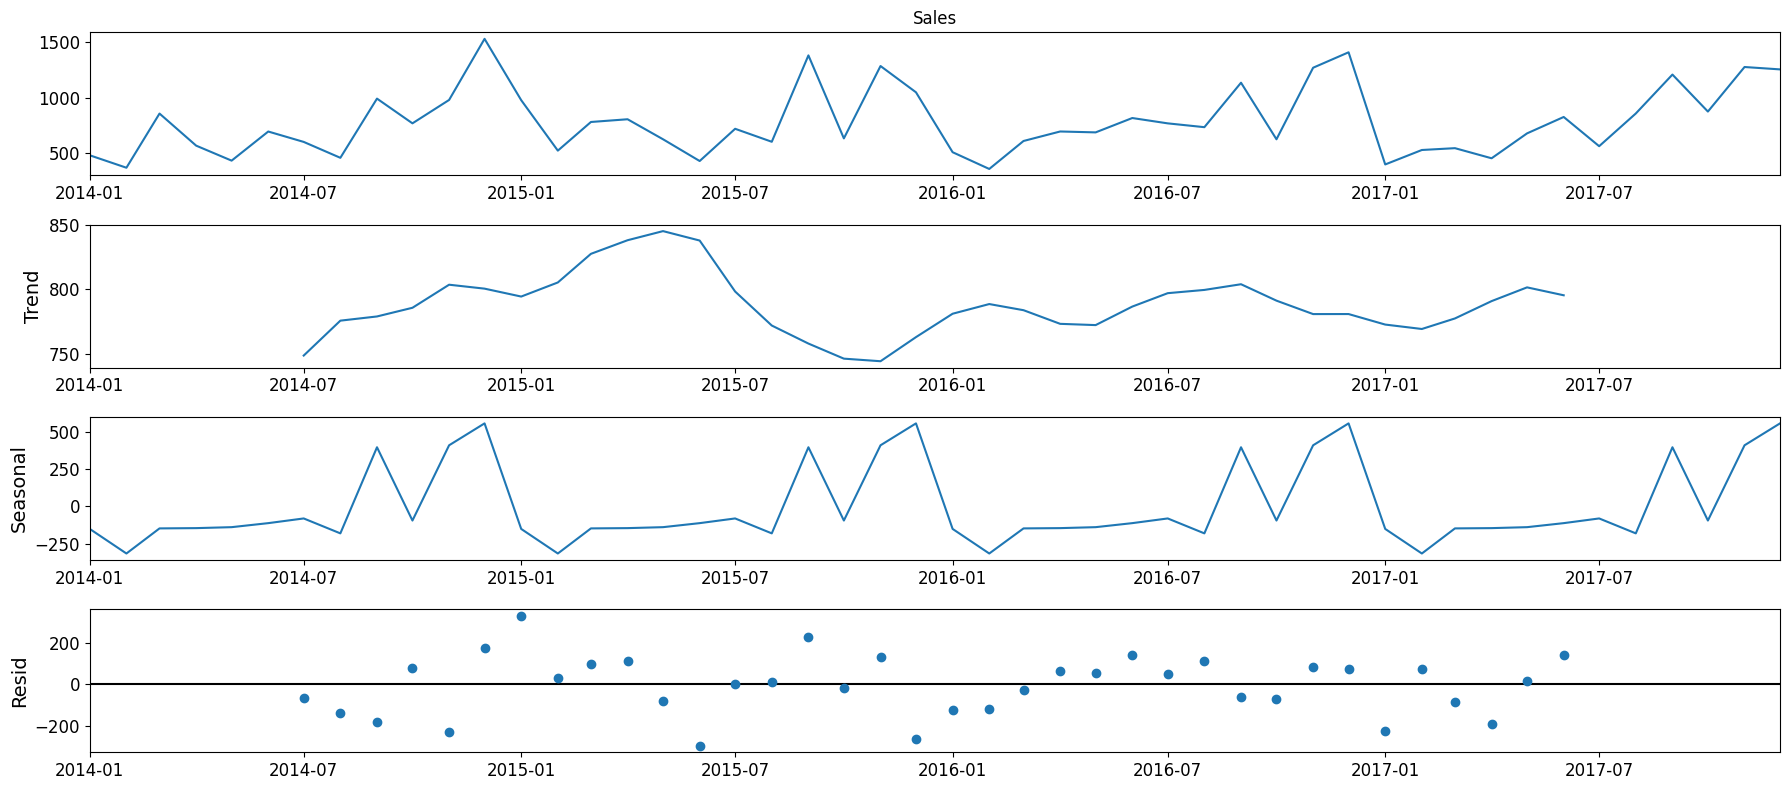

In [24]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [25]:
p = d = q = range(0,2)

In [32]:
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [ (x[0], x[1], x[2], 12) for x in pdq]

print('Examples of parameter combination for seasonal ARIMA')
print('SARIMAX {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combination for seasonal ARIMA
SARIMAX (0, 0, 1) x (0, 0, 1, 12)
SARIMAX (0, 0, 1) x (0, 1, 0, 12)
SARIMAX (0, 1, 0) x (0, 1, 1, 12)
SARIMAX (0, 1, 0) x (1, 0, 0, 12)


In [37]:
for param in pdq:
  for param_seasonal in seasonal_pdq:
    try:
      mod = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
      results = mod.fit()
      print('ARIMA{}x{}12 - AIC results {}'.format(param, param_seasonal, results.aic))
    except:
      print('Exception occurred')
      continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC results 769.0817523205915
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC results 1523.5085449297978
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC results 477.7170130919703


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC results 302.27028997935736
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC results 497.2314433418338
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC results 1317.1698862853953


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC results 318.0047199116341
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC results 304.24882803033336
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC results 720.9252270758099


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC results 2715.646290524748
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC results 466.56074298091517
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC results 291.6261389673299


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC results 499.61482929923943
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC results 2505.9754087946067
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC results 319.9884876946868


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC results 291.8725576437098
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC results 677.8947668259312


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC results 1362.3338317546836
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC results 486.6378567269187
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC results 304.9671228167952
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC results 497.78896630044073
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC results 1412.7664345389687
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC results 319.7714068109211


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC results 306.9113200151447
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC results 649.9056176817271


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC results 1935.211583857393
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC results 458.8705548482728
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC results 279.5806233401351
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC results 486.18329774427036


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC results 2561.1684419080807
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC results 310.7574368417285


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC results 281.55766214612555
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC results 692.1645522067713


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC results 1755.6522415154225
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC results 479.4632147852136
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC results 304.20776751609657
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC results 480.92593679351955


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC results 1258.8183236593795
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC results 304.46646750846116
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC results 304.5842692143826
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC results 665.7794442185808


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC results 2529.2024607214953
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC results 468.3685195814221
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC results 293.34221939659466
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC results 482.5763323876698


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC results 2439.064033652234
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC results 306.0156002121446


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC results 293.75131881261973
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC results 671.2513547541902


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC results 1610.3821137102082
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC results 479.2003422281135
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC results 300.2130611619097
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC results 475.3403658784638
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC results 1387.56288308395
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC results 300.62709013454116


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC results 302.3264992504886
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC results 649.0318019834904


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC results 994.7614540992078
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC results 460.476268760973
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC results 281.3873006939371
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC results 469.52503546609034


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC results 1397.0112715545645
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC results 297.7875439538356


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC results 283.36610144801216


In [44]:
mod = sm.tsa.statespace.SARIMAX(y, 
                                order=param, 
                                seasonal_order=param_seasonal,
                                enforce_invertibility=False)
results = mod.fit()
print('ARIMA(1, 1, 1)x(0, 1, 1, 12)12  - Results-AIC is {}'.format(results.aic))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 1)x(0, 1, 1, 12)12  - Results-AIC is 486.58215038965886


In [45]:
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -238.291
Date:                            Mon, 05 Jun 2023   AIC                            486.582
Time:                                    23:22:54   BIC                            494.359
Sample:                                01-01-2014   HQIC                           489.267
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0854      0.240      0.356      0.722      -0.385       0.556
ma.L1         -1.0000   3187.962   

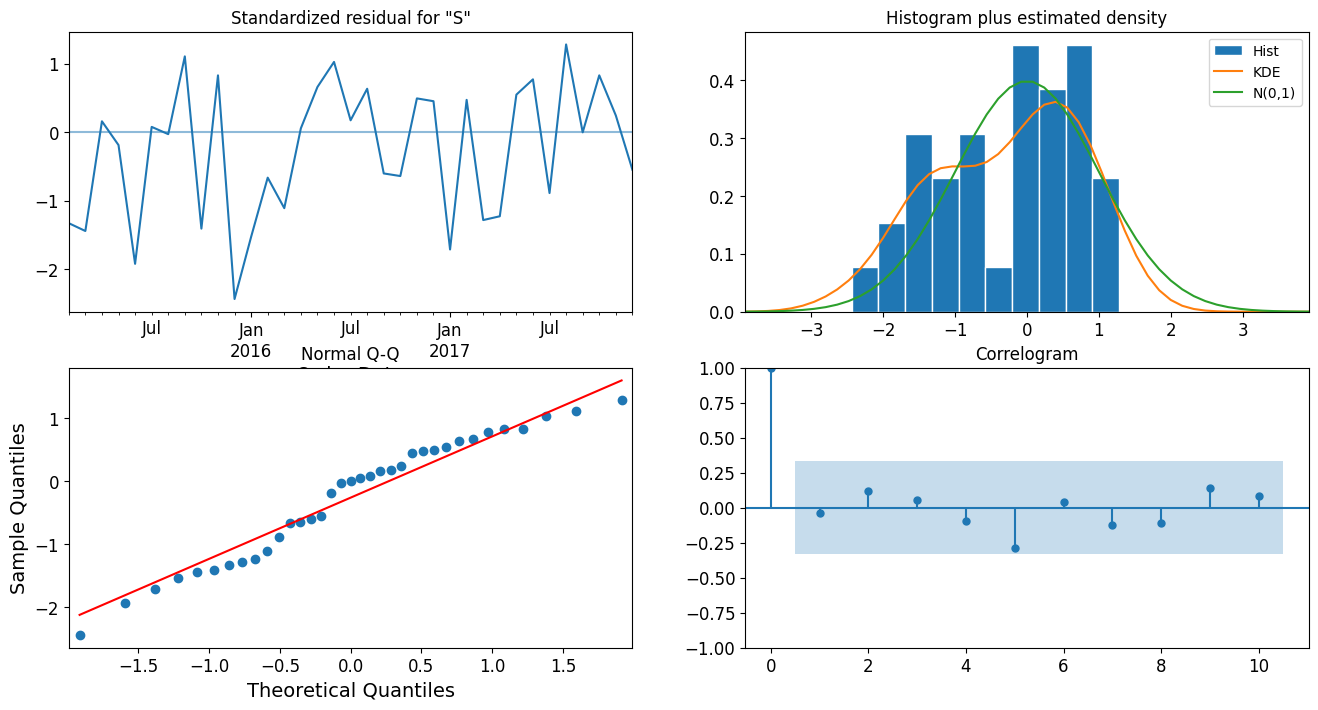

In [47]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

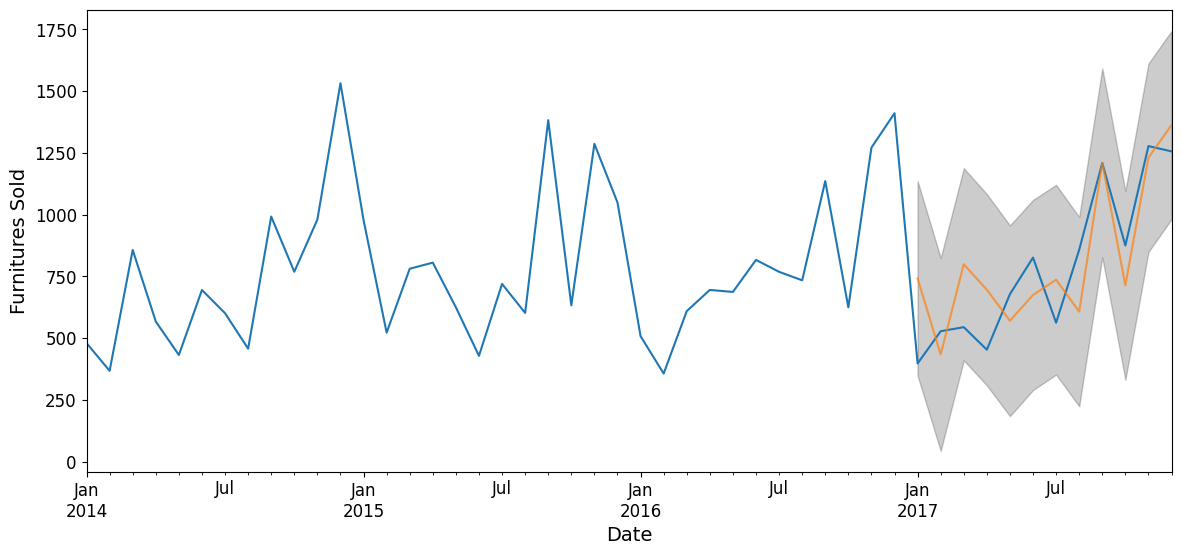

In [55]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=.7, figsize=(14,6))

ax.fill_between(
    pred_ci.index,
    pred_ci.iloc[:,0],
    pred_ci.iloc[:,1],
    color='k',
    alpha=.2
)
ax.set_xlabel('Date')
ax.set_ylabel('Furnitures Sold')
plt.show()


In [56]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]

mse = ((y_forecasted-y_truth)**2).mean()
print("The forecasted error is {}".format(round(mse,2)))

The forecasted error is 34904.03


In [57]:
print("The root mean square error is {}".format(round(np.sqrt(mse), 2)))

The root mean square error is 186.83


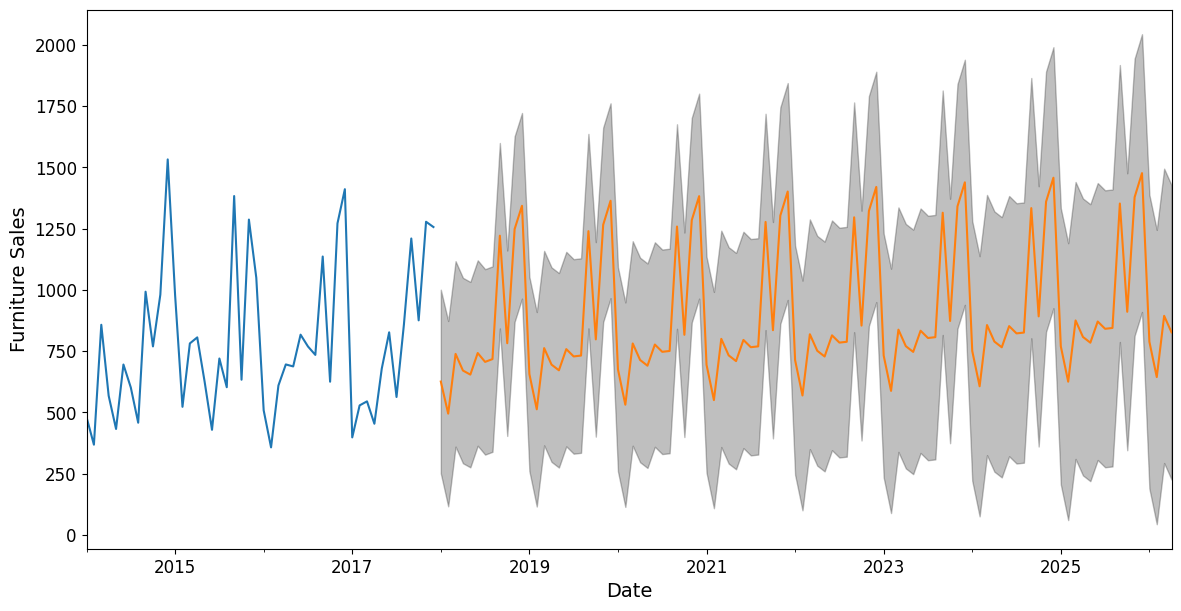

In [59]:
pred_us = results.get_forecast(steps=100)
pred_us_ci = pred_us.conf_int()

ax = y.plot(label='observed', figsize=(14,7))
pred_us.predicted_mean.plot(ax=ax, label='Forecast')

ax.fill_between(
    pred_us_ci.index,
    pred_us_ci.iloc[:,0],
    pred_us_ci.iloc[:,1],
    color='k',
    alpha=.25
)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.show()

### **Creating a forecast comparison between Furniture and Office Sales:**

In [61]:
furniture = df.loc[df['Category']=='Furniture']
office = df.loc[df['Category']=='Office Supplies']

In [62]:
furniture.shape, office.shape

((2121, 21), (6026, 21))

In [63]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
office.drop(cols, axis=1, inplace=True)

furniture.sort_values('Order Date')
office.sort_values('Order Date')

furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
office = office.groupby('Order Date')['Sales'].sum().reset_index()

<ipython-input-63-f3a66009df96>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furniture.drop(cols, axis=1, inplace=True)
<ipython-input-63-f3a66009df96>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  office.drop(cols, axis=1, inplace=True)


In [64]:
furniture.head()

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939


In [65]:
office.head()

,Order Date,Sales
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,685.340
4,2014-01-07,10.430


In [66]:
furniture = furniture.set_index('Order Date')
office = office.set_index('Order Date')

y_furniture = furniture['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()

In [67]:
furniture = pd.DataFrame({'Order Date':y_furniture.index, 'Sales':y_furniture.values})
office = pd.DataFrame({'Order Date':y_office.index, 'Sales':y_office.values})

In [69]:
store = furniture.merge(office, how="inner", on='Order Date')
store.head()

,Order Date,Sales_x,Sales_y
0,2014-01-01,480.194231,285.357647
1,2014-02-01,367.931600,63.042588
2,2014-03-01,857.291529,391.176318
3,2014-04-01,567.488357,464.794750
4,2014-05-01,432.049188,324.346545


In [70]:
store.rename(columns={'Sales_x':'furniture sales', 'Sales_y':'office_sales'}, inplace=True)
store.head()

,Order Date,furniture sales,office_sales
0,2014-01-01,480.194231,285.357647
1,2014-02-01,367.931600,63.042588
2,2014-03-01,857.291529,391.176318
3,2014-04-01,567.488357,464.794750
4,2014-05-01,432.049188,324.346545


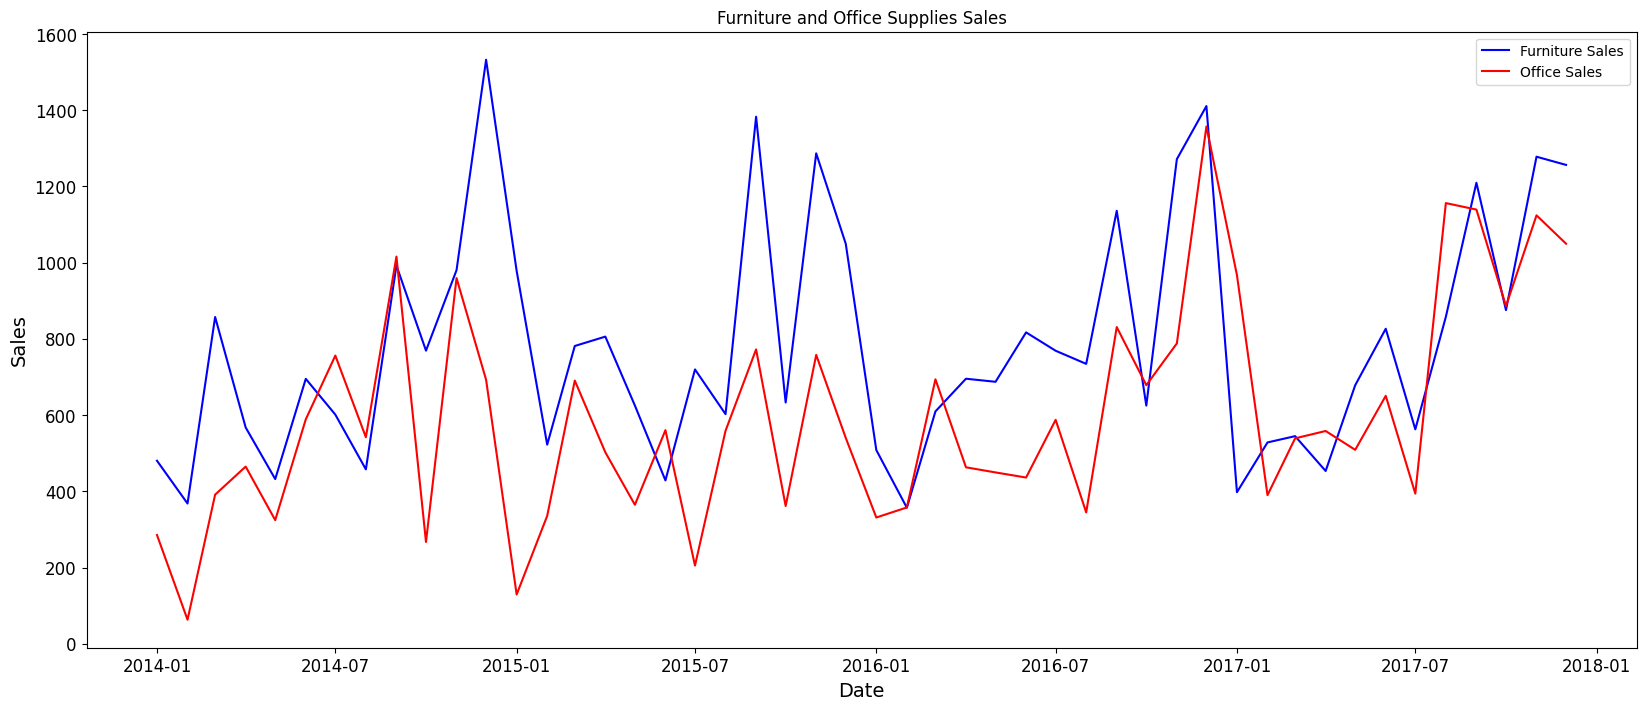

In [71]:
plt.figure(figsize=(20,8))
plt.plot(store['Order Date'], store['furniture sales'], 'b-', label='Furniture Sales')
plt.plot(store['Order Date'], store['office_sales'], 'r-', label='Office Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Furniture and Office Supplies Sales')
plt.legend()
plt.show()

In [75]:
np.min(list(np.where(store['office_sales']>store['furniture sales'])[0]))

6

In [77]:
first_date = store.iloc[6]
print("Office supplies first time produced higher sales than furniture is {}.".format(first_date))

Office supplies first time produced higher sales than furniture is Order Date         2014-07-01 00:00:00
furniture sales               601.1695
office_sales                  756.0604
Name: 6, dtype: object.


In [80]:
#pip install fbprophet
from prophet import Prophet

furniture = furniture.rename( columns={'Order Date':'ds', 'Sales':'y'})
furniture_model = Prophet(interval_width=0.95)
furniture_model.fit(furniture)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8lkl7zpr/l0ip3spz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8lkl7zpr/1u83lcru.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=307', 'data', 'file=/tmp/tmp8lkl7zpr/l0ip3spz.json', 'init=/tmp/tmp8lkl7zpr/1u83lcru.json', 'output', 'file=/tmp/tmp8lkl7zpr/prophet_model9435yk1u/prophet_model-20230606001859.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:18:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:19:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [81]:
office = office.rename( columns={'Order Date':'ds', 'Sales':'y'})
office_model = Prophet(interval_width=0.95)
office_model.fit(office)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8lkl7zpr/ofz1uc5q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8lkl7zpr/pouh7474.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49588', 'data', 'file=/tmp/tmp8lkl7zpr/ofz1uc5q.json', 'init=/tmp/tmp8lkl7zpr/pouh7474.json', 'output', 'file=/tmp/tmp8lkl7zpr/prophet_modelxexlvdpe/prophet_model-20230606002016.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:20:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:20:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [82]:
furniture_forecast = furniture_model.make_future_dataframe(periods=36, freq='MS')
office_forecast = office_model.make_future_dataframe(periods=36, freq='MS')

In [83]:
furniture_forecast = furniture_model.predict(furniture_forecast)
office_forecast = office_model.predict(office_forecast)  

Text(0.5, 1.0, 'Furniture Sales')

<Figure size 1800x600 with 0 Axes>

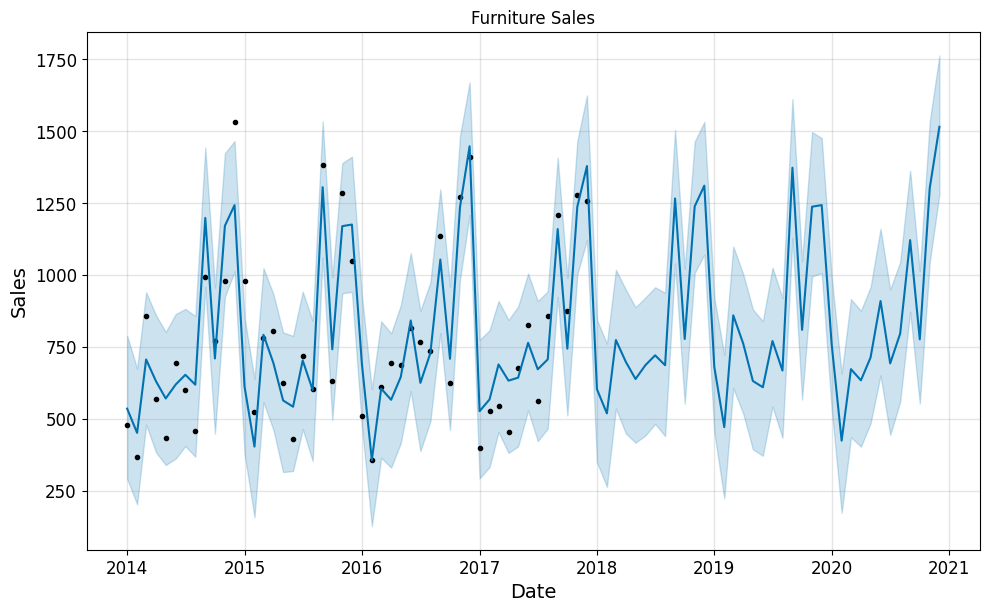

In [84]:
plt.figure(figsize=(18,6))
furniture_model.plot(furniture_forecast, xlabel='Date', ylabel='Sales')
plt.title('Furniture Sales')

Text(0.5, 1.0, 'Office Supplies Sales')

<Figure size 1800x600 with 0 Axes>

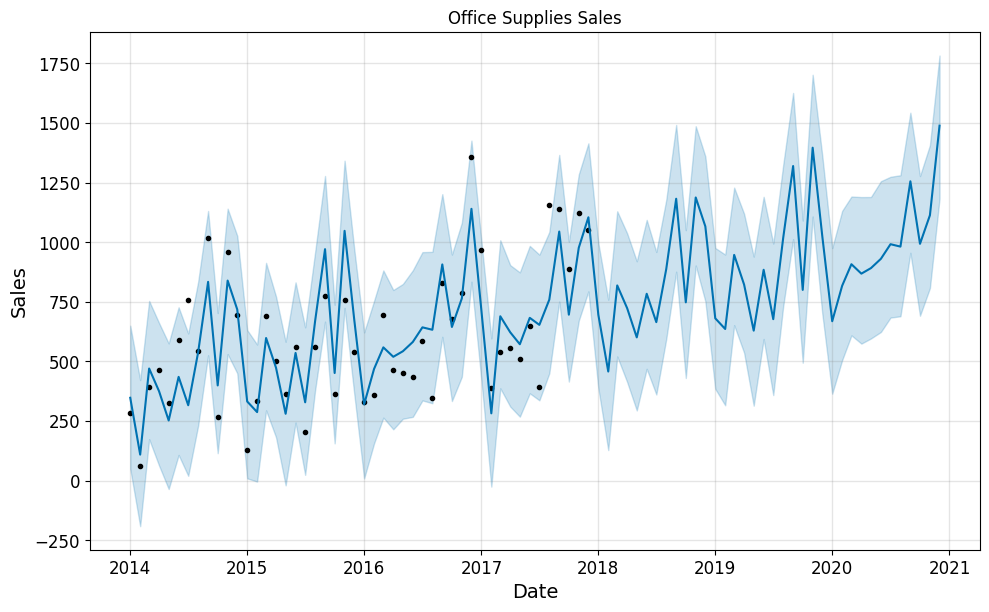

In [87]:
plt.figure(figsize=(18,6))
office_model.plot(office_forecast, xlabel='Date', ylabel='Sales')
plt.title('Office Supplies Sales')

In [89]:
furniture_names = ['furniture_%s' % column for column in furniture_forecast.columns]
office_names = ['office_%s' % column for column in office_forecast.columns]

merge_furniture_forecast = furniture_forecast.copy()
merge_office_forecast = office_forecast.copy()

merge_furniture_forecast.columns = furniture_names
merge_office_forecast.columns = office_names

forecast = pd.merge(merge_furniture_forecast, merge_office_forecast, how="inner", left_on="furniture_ds", right_on="office_ds")

forecast = forecast.rename(columns={'furniture_ds':'Date'}).drop(['office_ds'], axis=1)

forecast.head()


,Date,furniture_trend,furniture_yhat_lower,furniture_yhat_upper,furniture_trend_lower,furniture_trend_upper,furniture_additive_terms,furniture_additive_terms_lower,furniture_additive_terms_upper,furniture_yearly,...,office_additive_terms,office_additive_terms_lower,office_additive_terms_upper,office_yearly,office_yearly_lower,office_yearly_upper,office_multiplicative_terms,office_multiplicative_terms_lower,office_multiplicative_terms_upper,office_yhat
0,2014-01-01,726.058109,291.523743,788.814983,726.058109,726.058109,-190.686099,-190.686099,-190.686099,-190.686099,...,-140.041115,-140.041115,-140.041115,-140.041115,-140.041115,-140.041115,0.0,0.0,0.0,347.489370
1,2014-02-01,727.494421,202.589911,674.512698,727.494421,727.494421,-276.379157,-276.379157,-276.379157,-276.379157,...,-385.677761,-385.677761,-385.677761,-385.677761,-385.677761,-385.677761,0.0,0.0,0.0,109.240405
2,2014-03-01,728.791734,479.453495,940.162680,728.791734,728.791734,-22.388253,-22.388253,-22.388253,-22.388253,...,-31.378526,-31.378526,-31.378526,-31.378526,-31.378526,-31.378526,0.0,0.0,0.0,470.212385
3,2014-04-01,730.228046,383.089614,859.582225,730.228046,730.228046,-100.140909,-100.140909,-100.140909,-100.140909,...,-134.290665,-134.290665,-134.290665,-134.290665,-134.290665,-134.290665,0.0,0.0,0.0,374.687928
4,2014-05-01,731.618025,339.218941,801.963306,731.618025,731.618025,-160.818882,-160.818882,-160.818882,-160.818882,...,-263.823552,-263.823552,-263.823552,-263.823552,-263.823552,-263.823552,0.0,0.0,0.0,252.304409


Text(0.5, 1.0, 'Furniture vs Office Sales Trend')

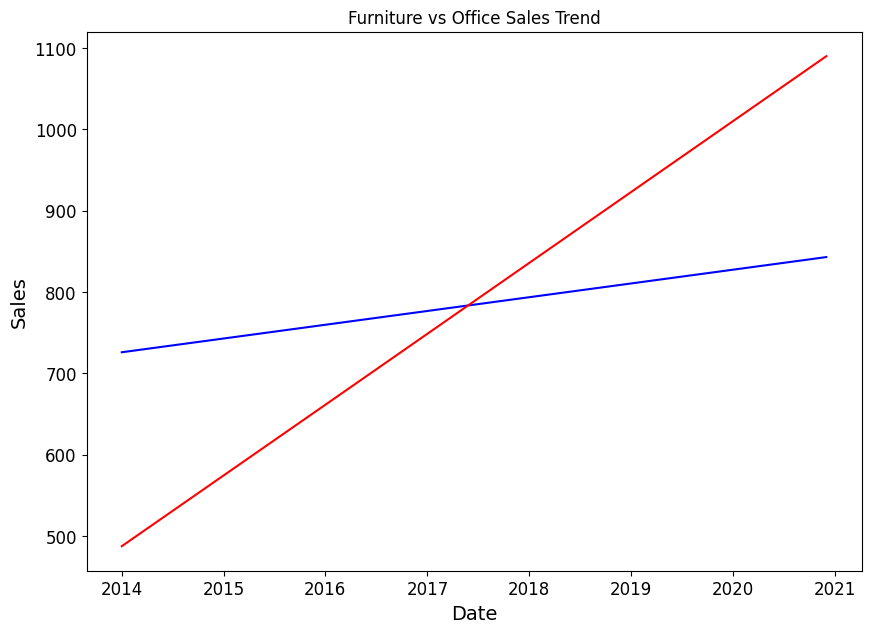

In [90]:
plt.figure(figsize=(10,7))
plt.plot(forecast['Date'], forecast['furniture_trend'], 'b-')
plt.plot(forecast['Date'], forecast['office_trend'], 'r-')
plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('Furniture vs Office Sales Trend')

Text(0.5, 1.0, 'Furniture vs Office Sales Supplies Comparison')

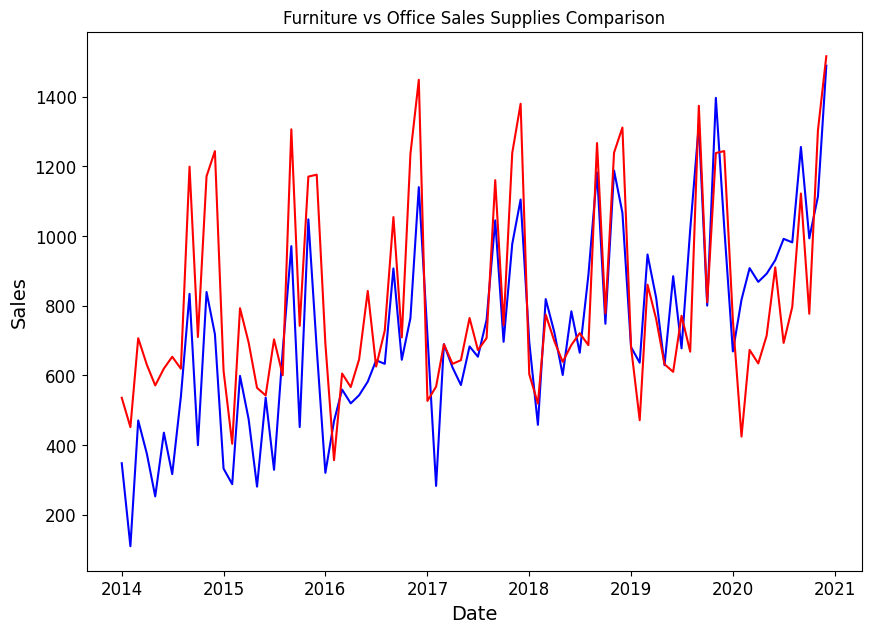

In [91]:
plt.figure(figsize=(10,7))
plt.plot(forecast['Date'], forecast['office_yhat'], 'b-')
plt.plot(forecast['Date'], forecast['furniture_yhat'], 'r-')
plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('Furniture vs Office Sales Supplies Comparison')

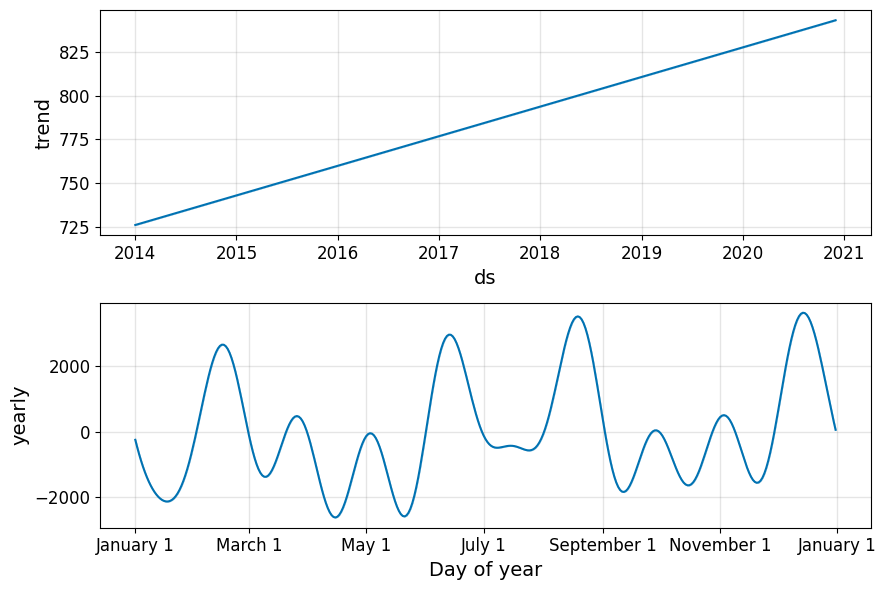

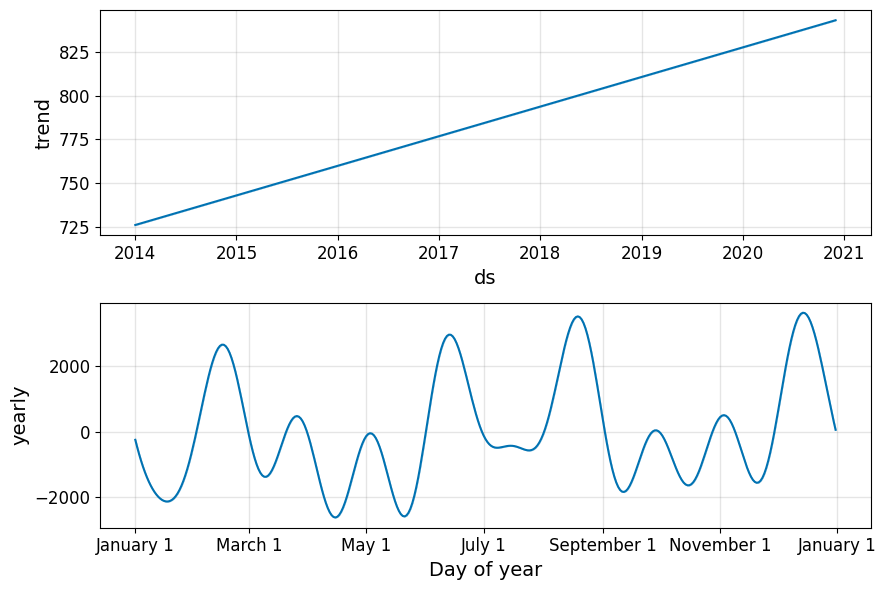

In [92]:
furniture_model.plot_components(furniture_forecast)

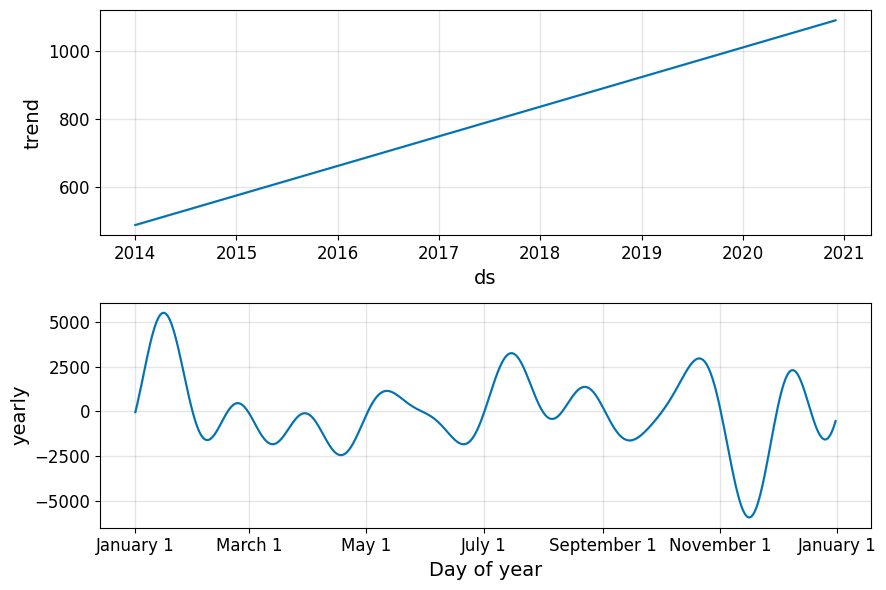

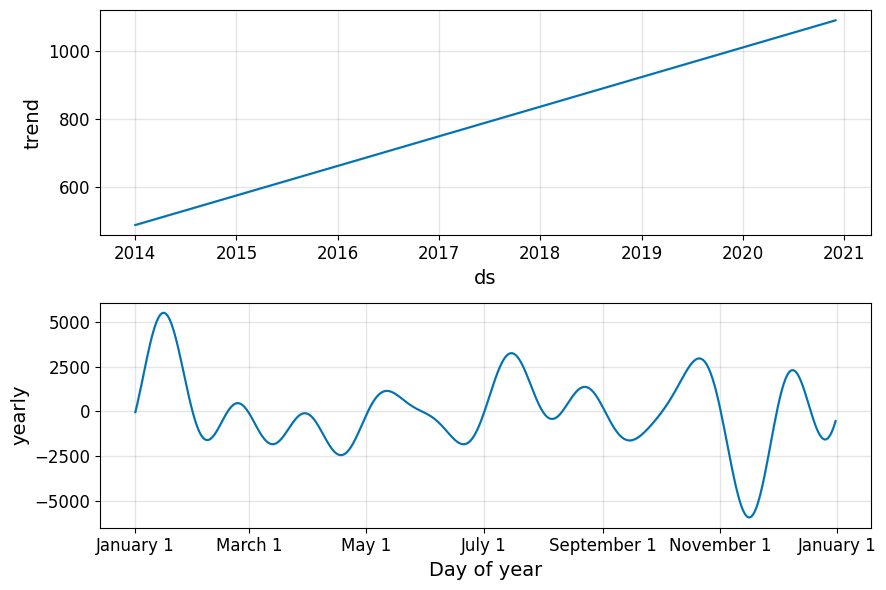

In [93]:
office_model.plot_components(office_forecast)